In [12]:
# !pip install keras
# !pip install tensorflow-gpu==2.2
!sudo -H pip install pydot
!sudo -H pip install graphviz
!sudo -H pip install pydotplus

     |████████████████████████████████| 278 kB 5.0 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=4338729818a00b052a3ecf3d5d9a5cab4124a8b3d699fb5f98bbbd0ed3b09405
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [ ]:
!conda install pydot
!conda install pydotplus
!conda install -c anaconda graphviz


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pydotplus


The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_1


Proceed ([y]/n)? ^C

CondaSystemExit: 
Operation aborted.  Exiting.



In [1]:
import sys
import numpy as np
import pandas as pd
# from scipy.misc import imread
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
from keras.optimizers import SGD

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.models import load_model


from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import AveragePooling2D, Input
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Cropping2D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
# #################################
    input_shape=(400, 225, 3)
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    encoded_l = (left_input)
    encoded_r = (right_input)
    
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

#     prediction = Dense(1,activation='sigmoid')(L1_distance)


    # Initialising the CNN    
    # Convolutional Neural Network
   # Step 1 - Convolution
    x1= Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(L1_distance)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a second convolutional layer
    x1= Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a third convolutional layer
    x1= Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    # Adding a fourth convolutional layer
    x1= Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(x1)
    x1= BatchNormalization()(x1)
    x1= MaxPooling2D(pool_size = (2, 2))(x1)
    x1= Dropout(0.2)(x1)
    x1= GlobalMaxPooling2D()(x1)
    x1= Dense(128, activation='relu', kernel_initializer='he_uniform')(x1)
    x1= Dropout(0.5)(x1)
    
    x1=  Dense(1,activation='sigmoid')(x1)

    siamese_net = Model(inputs=[left_input,right_input],outputs=x1)

    # Generate the encodings (feature vectors) for the two images
#     encoded_l = model(left_input)
#     encoded_r = model(right_input)
    
#     # Add a customized layer to compute the absolute difference between the encodings
#     L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
#     L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
#     prediction = Dense(1,activation='sigmoid')
#     prediction = Dense(1,activation='sigmoid')(L1_distance)

    
    # Connect the inputs with the outputs
#     siamese_net = Model(inputs=L1_distance,outputs=prediction)

#     siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    keras.utils.plot_model(siamese_net, "high.png", show_shapes=True)
    # return the model
    return siamese_net

In [4]:
model = get_siamese_model((400, 225, 3))
model.summary()

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400, 225, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 400, 225, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 400, 225, 3)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
conv2d (

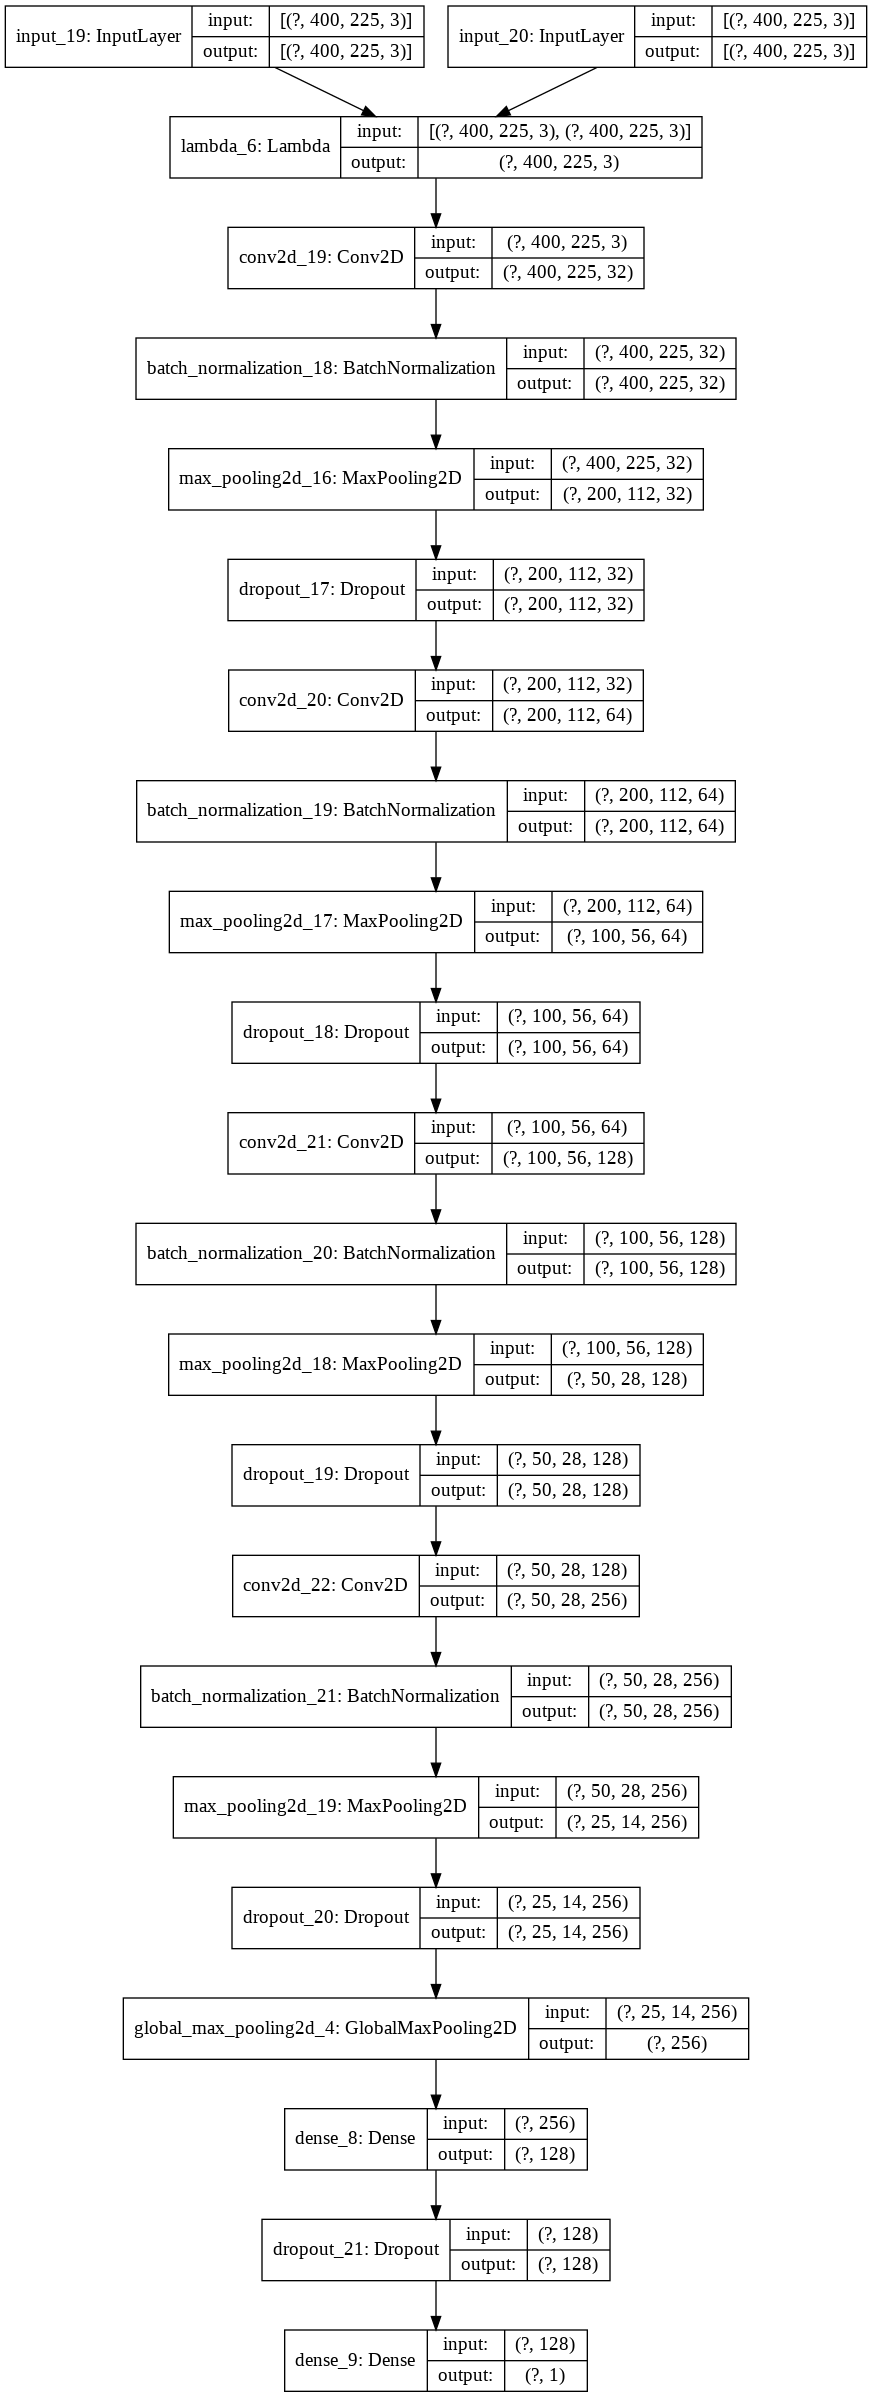

In [5]:
from IPython.display import Image
Image(retina=True, filename='high.png')

In [6]:
# model = load_model("weights_imported/Siamese_network_high-embeddings-epoch21.h5")
model.load_weights("weights_imported/Siamese_network_high-embeddings-v2-epoch31.h5")


In [8]:
opt = SGD(lr=0.001, momentum=0.9)
# model.compile(loss="binary_crossentropy",optimizer=opt,metrics = ['accuracy','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])
model.compile(loss="binary_crossentropy",optimizer=opt,metrics =[tf.keras.metrics.AUC()])

In [9]:
batch_size=32


train_datagen = ImageDataGenerator(
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   vertical_flip = True,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(                                 )

training_set = train_datagen.flow_from_directory('data/Florida/day1_full/train/',
                                                 target_size = (400, 225),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')


# test_set = test_datagen.flow_from_directory('data/Florida/day1_full/test/',
#                                             target_size = (400, 225),
#                                             batch_size = batch_size,
#                                             class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/Florida/test_3096/',
                                            target_size = (400, 225),
                                            batch_size = batch_size,
                                            class_mode = 'binary')
img_height = 225
img_width = 400
dir1= 'data/Florida/day1_full/train/'
# dir2= 'data/Florida/day1_full/test/'
dir2= 'data/Florida/test_3096/'

# dir3= 'data/Florida/day1_full/test/'
# dir4= 'data/Florida/day1_full/test/'

input_imgen = ImageDataGenerator(#rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   rotation_range=5.,
                                   horizontal_flip = True)

test_imgen = ImageDataGenerator(#rescale = 1./255
                               )


def generate_generator_multiple(generator,dir1, dir2, batch_size, img_height,img_width):
    genX1 = generator.flow_from_directory(dir1,
                                          target_size = (img_height,img_width),
                                          class_mode = 'binary',
                                          batch_size = batch_size
                                         )
    
    genX2 = generator.flow_from_directory(dir2,
                                          target_size = (img_height,img_width),
                                          class_mode = 'binary',
                                          batch_size = batch_size
                                         )
    while True:
            X1i = genX1.next()
            X2i = genX2.next()
            yield [X1i[0], X2i[0]], X2i[1]  #Yield both images and their mutual label
            
            
inputgenerator=generate_generator_multiple(generator=input_imgen,
                                           dir1=dir1,
                                           dir2=dir1,
                                           batch_size=batch_size,
                                           img_height=img_height,
                                           img_width=img_width)       
     
testgenerator=generate_generator_multiple(test_imgen,
                                          dir1=dir2,
                                          dir2=dir2,
                                          batch_size=batch_size,
                                          img_height=img_height,
                                          img_width=img_width)              
steps_per_epoch =round(len(training_set))
validation_steps =round(len(test_set))
# print(steps_per_epoch)
# print(validation_steps)

history=model.fit(inputgenerator,
                        steps_per_epoch=steps_per_epoch,
                        epochs = 2,
                        validation_data = testgenerator,
                        validation_steps = validation_steps,
#                         use_multiprocessing=True,
                        shuffle=False)


Found 32410 images belonging to 2 classes.
Found 3097 images belonging to 2 classes.
Found 32410 images belonging to 2 classes.
Found 32410 images belonging to 2 classes.
Epoch 1/2
1013/1013 [==============================] - ETA: 0s - loss: 0.6643 - auc: 0.6223Found 3097 images belonging to 2 classes.
Found 3097 images belonging to 2 classes.
1013/1013 [==============================] - 8632s 9s/step - loss: 0.6643 - auc: 0.6223 - val_loss: 0.8873 - val_auc: 0.4062
Epoch 2/2
 338/1013 [=========>....................] - ETA: 1:32:57 - loss: 0.6640 - auc: 0.6188

UnknownError:  PermissionError: [Errno 13] Permission denied: 'data/Florida/day1_full/train/vehicles/2020081214000000003349.jpg'
Traceback (most recent call last):

  File "/opt/conda/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 243, in __call__
    ret = func(*args)

  File "/opt/conda/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 309, in wrapper
    return func(*args, **kwargs)

  File "/opt/conda/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 785, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 801, in wrapped_generator
    for data in generator_fn():

  File "<ipython-input-9-3ec453707adc>", line 63, in generate_generator_multiple
    X2i = genX2.next()

  File "/opt/conda/lib/python3.8/site-packages/keras_preprocessing/image/iterator.py", line 116, in next
    return self._get_batches_of_transformed_samples(index_array)

  File "/opt/conda/lib/python3.8/site-packages/keras_preprocessing/image/iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "/opt/conda/lib/python3.8/site-packages/keras_preprocessing/image/utils.py", line 113, in load_img
    with open(path, 'rb') as f:

PermissionError: [Errno 13] Permission denied: 'data/Florida/day1_full/train/vehicles/2020081214000000003349.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_2273]

Function call stack:
train_function


In [15]:
# #load weights
# classifier = load_model("weights/siamese_4layers_day1_v1.h5")

OSError: SavedModel file does not exist at: weights/siamese_4layers_day1_v1.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
#save weights
model.save("weights/Siamese_network_high-embeddings-v2-epoch4.h5")